In [52]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

from technologies import POSSIBLE_TECHNOLOGIES

In [53]:
with open("filename.txt", "r") as file:
    file_name = file.read()
df_init = pd.read_csv(file_name)
df_init

,date,title,site_id,company,technology_stack,salary_margin,salary,required_experience
0,2023-12-22,Senior Python Developer,/jobs/5464012/,VOL company,"['Java', 'Python', 'SQL', 'HTML', 'Django', 'C...","[24000, 30000]",27000.0,5
1,2023-12-14,Python developer,/jobs/5302747/,Appexoft,"['Python', 'SQL', 'Django', 'GIT', 'WEB']",Unknown,NaN,1
2,2023-12-19,"Middle Developer (PHP, JS, Java, C/C++, C#, Ru...",/jobs/5350335/,LuckyWare Pro,"['PHP', 'Java', 'JS', 'Python', 'C++', 'Ruby',...",Unknown,NaN,2
3,2023-12-27,Junior Python Developer,/jobs/5466723/,Solidway,['Python'],As interview result,NaN,0
4,2024-01-08,"Intern/trainee analytic programmer (DAX, M, VB...",/jobs/5184790/,Business Research Group,['Python'],As interview result,NaN,0
5,2024-01-05,Python Backend Developer,/jobs/5463316/,"Trendline, LLC","['Python', 'SQL', 'Docker', 'Django', 'API']",As interview result,NaN,2
6,2024-01-05,"Junior Python AQA, Developer in Test",/jobs/5456736/,Ajax Systems,"['Python', 'SQL', 'Docker', 'GIT', 'CI/CD']",Unknown,NaN,0
7,2023-12-21,Python-розробник,/jobs/5463142/,"Кодісофт, ТОВ","['JS', 'Python']",[37000],37000.0,1
8,2024-01-07,Викладач у дитячу ІТ-школу програмування (Pyth...,/jobs/4563892/,"Logika, мiжнародна школа програмування для дiтей",['Python'],"[5000, 8000]",6500.0,0
9,2024-01-09,Senior Python Developer,/jobs/5452563/,EVA.tech,"['Python', 'SQL', 'Django', 'WEB', 'Redis']",Unknown,NaN,2


In [54]:
items = [i for i in list(df_init["technology_stack"])]
technologies_list = [ast.literal_eval(lang_str) for lang_str in items]

df1 = pd.DataFrame({"technology": POSSIBLE_TECHNOLOGIES})

df2 = pd.DataFrame({"technologies": technologies_list})
all_items = [item for sublist in df2["technologies"] for item in sublist]

item_counts = pd.Series(all_items).value_counts().reset_index()
item_counts.columns = ["technology", "count"]

technologies_count = pd.merge(df1, item_counts, how="left", left_on="technology", right_on="technology").fillna(0)
technologies_count

,technology,count
0,PHP,3.0
1,Java,12.0
2,JS,5.0
3,Python,41.0
4,SQL,15.0
5,C++,1.0
6,Ruby,1.0
7,Docker,11.0
8,ETL,0.0
9,Pandas,1.0


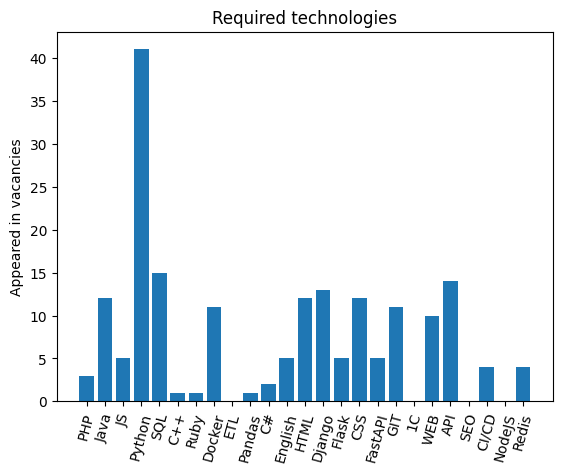

In [55]:
plt.bar(technologies_count["technology"], technologies_count["count"])
plt.xticks(rotation=75)
plt.title("Required technologies")
plt.ylabel("Appeared in vacancies")
initial_input = file_name.split('\\')[-1].split('.')[0]
plot_path = f".\\plots\\{initial_input}_required_technologies_bar.png"
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()

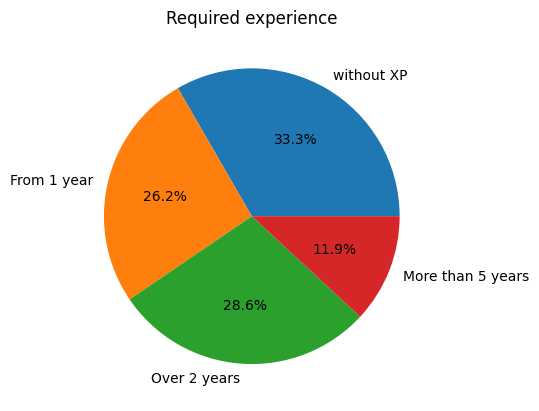

In [56]:
df_init['date'] = pd.to_datetime(df_init['date'])
experience_years = df_init.groupby("required_experience")["title"].count()
plt.pie(experience_years, labels = ["without XP","From 1 year","Over 2 years","More than 5 years"], autopct="%1.1f%%")
plt.title("Required experience")
plot_path = f".\\plots\\{initial_input}_required_experience_pie.png"
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()

Create top 10 most highly-payable vacancies bar

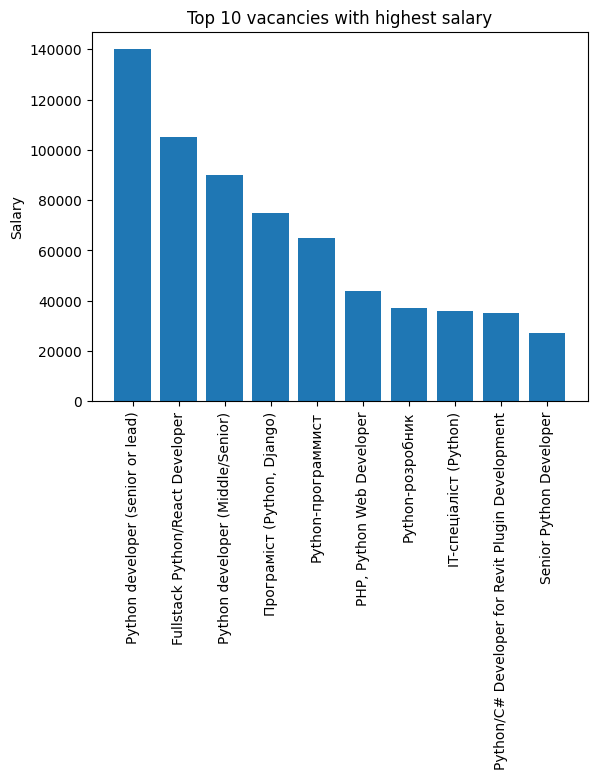

In [57]:
df_with_salary = df_init[df_init.notna().all(axis=1)]
top_10 = df_with_salary.sort_values(by="salary", ascending=False).head(10)
plt.bar(top_10["title"], top_10["salary"])
plt.xticks(rotation=90)
plt.ylabel("Salary")
plt.title("Top 10 vacancies with highest salary")
plot_path = f".\\plots\\{initial_input}_top_10_vacancies.png"
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()

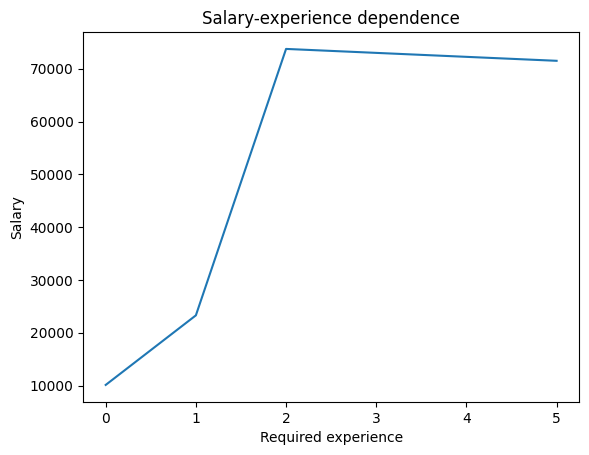

In [58]:
years_salary = df_with_salary.groupby("required_experience")["salary"].mean()
plt.plot(years_salary)
plt.title("Salary-experience dependence")
plt.ylabel("Salary")
plt.xlabel("Required experience")
plot_path = f".\\plots\\{initial_input}_years_salary.png"
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
plt.show()